In [678]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import math

In [679]:
spy = pd.read_csv("/Users/austinriis-due/Documents/GitHub/SPY.csv")

In [680]:
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-24,300.910004,301.070007,299.459991,300.369995,294.671631,35453100
1,2019-10-25,299.739990,302.200012,299.679993,301.600006,295.878296,45205400
2,2019-10-28,302.940002,303.850006,302.910004,303.299988,297.546021,42147000
3,2019-10-29,303.000000,304.230011,302.859985,303.209991,297.457733,44284900
4,2019-10-30,303.429993,304.549988,301.989990,304.140015,298.370117,49643900
...,...,...,...,...,...,...,...
248,2020-10-19,348.649994,349.329987,341.040009,342.010010,342.010010,68425600
249,2020-10-20,343.459991,346.880005,342.640015,343.380005,343.380005,60051900
250,2020-10-21,343.329987,345.670013,342.399994,342.730011,342.730011,63575000
251,2020-10-22,342.959991,345.239990,340.649994,344.609985,344.609985,55399300


In [731]:
#adding daily returns column close to close
r = [0]
i = 1
while i < len(spy.Close):
    s = (spy.Close[i] / spy.Close[i-1])-1
    r.append(s)
    i+= 1
r[0] = sum(r)/len(r) #no data before row 0; inserted average
spy["Returns"] = r
spy.Returns.describe()

count    253.000000
mean       0.000776
std        0.020718
min       -0.109424
25%       -0.005330
50%        0.002187
75%        0.008318
max        0.090603
Name: Returns, dtype: float64

In [732]:
# daily deviation from mean
devObs = abs(spy["Returns"] - spy.Returns.mean())
spy["devObs"] = devObs
spy.devObs.describe()

count    253.000000
mean       0.012396
std        0.016582
min        0.000003
25%        0.002741
50%        0.006975
75%        0.014442
max        0.110199
Name: devObs, dtype: float64

In [733]:
# fitting theta parameter
t = (((spy.devObs.std())**2))/spy.devObs.mean()
t

0.022182078587309004

In [734]:
# fitting alpha parameter
a = spy.devObs.mean()/t
a

0.5588071577185282

In [736]:
print(a*t)

0.01239550428766317


In [737]:
# monte carlo sim from gamma distribution
def getVol(alpha, theta):
    u = random.uniform(0,1)
    return(st.gamma.ppf(u,a=alpha,scale = theta))

In [743]:
getVol(a,t)

0.013386972011104207

In [744]:
#monte carlo sim for returns and price formula
def getPrice(s_0,mu,divs, alpha, theta):
    sigma = getVol(alpha, theta)
    u = random.uniform(0,1)
    Z = st.norm.ppf(u)
    return(s_0*math.exp(mu - divs-(.5*(sigma**2))+sigma*Z))

In [745]:
#test for 2 day paths based on 10/23 close prices
s1 = []
s2 = []
for i in range(100000):
    x = getPrice(s_0 = 344.61,mu = spy["Returns"].mean(),divs = 0,alpha = a,theta = t)
    s1.append(x)
for v in s1:
    x = getPrice(s_0 = v,mu = spy["Returns"].mean(),divs = 0,alpha = a,theta = t)
    s2.append(x)

In [746]:
# day one test stats
pd.Series(s1).describe()

count    100000.000000
mean        344.869867
std           7.143082
min         201.519749
25%         343.738787
50%         344.876833
75%         345.905692
max         540.313132
dtype: float64

In [747]:
#day two test stats
pd.Series(s2).describe()

count    100000.000000
mean        345.115349
std          10.105681
min         177.019480
25%         342.162404
50%         345.122796
75%         347.914088
max         511.788807
dtype: float64

(array([1.0000e+00, 9.0000e+00, 1.5000e+02, 6.0250e+03, 9.3057e+04,
        6.9200e+02, 5.4000e+01, 1.0000e+01, 1.0000e+00, 1.0000e+00]),
 array([201.51974853, 235.39908688, 269.27842523, 303.15776357,
        337.03710192, 370.91644027, 404.79577861, 438.67511696,
        472.5544553 , 506.43379365, 540.313132  ]),
 <a list of 10 Patch objects>)

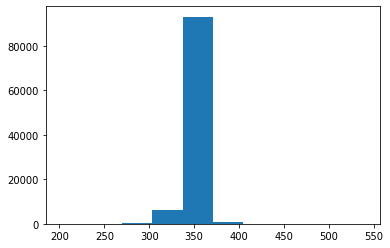

In [748]:
#day one histogram
plt.hist(s1)

(array([2.0000e+00, 0.0000e+00, 5.8000e+01, 6.2900e+02, 3.9151e+04,
        5.9238e+04, 8.3400e+02, 6.0000e+01, 2.4000e+01, 4.0000e+00]),
 array([177.01948027, 210.49641291, 243.97334554, 277.45027818,
        310.92721081, 344.40414345, 377.88107608, 411.35800872,
        444.83494135, 478.31187399, 511.78880663]),
 <a list of 10 Patch objects>)

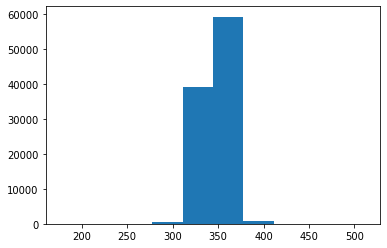

In [749]:
#day two histogram
plt.hist(s2)